In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
from skimage import io, transform
import skimage
import torch
from torchvision import transforms, utils
from torch.utils.data import DataLoader
import os
import ImageDataset
import mask_generation
%matplotlib inline

In [2]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(100,100),(50,500),(255),50)

In [3]:
def gen_mask(img_size=256, max_strokes=5, max_width=60):
    img = np.zeros((img_size,img_size), np.uint8)
    start_x=np.random.randint(0, img_size)
    start_y=np.random.randint(0, img_size)
    n_strokes=np.random.randint(1, max_strokes)
    for i in range(n_strokes):
        end_x=np.random.randint(0, img_size)
        end_y=np.random.randint(0,img_size)
        width = np.random.randint(20,max_width)
        img = cv2.line(img,(start_x,start_y),(end_x,end_y),(1),width)
        start_x,start_y=end_x,end_y
    return img

In [179]:
a = torch.autograd.Variable(torch.Tensor([4, 1, 0, -1, 0, 0, 5]), requires_grad=True)

In [172]:
b = torch.ones(4)

In [173]:
z = (a*b).mean()**2

In [174]:
z.backward()

In [182]:
a.grad

tensor([ 2.5000,  2.5000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])

In [176]:
idx = torch.LongTensor([0, 1])

In [177]:
a.nonzero()

tensor([[ 0],
        [ 1],
        [ 3],
        [ 6]])

In [180]:
z = a.index_select(0, idx).mean()**2

In [181]:
z.backward()

In [4]:
img = gen_mask()

In [5]:
torch.Tensor(gen_mask()).unsqueeze(0).size()

torch.Size([1, 256, 256])

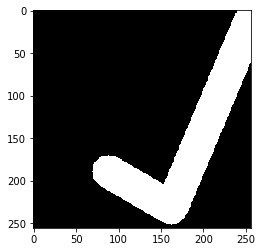

In [136]:
plt.imshow(gen_mask(), cmap='gray');

In [4]:
img = Image.open('../data/cityscapes/train/a176a4bf33dcac1ec45f14078ae0daa4-47e01848-1907-46c8-a702-bc874fc0e048.png')

In [2]:
image_size = 256
# dataset = ImageDataset.ImageDataset(["../data/cityscapes/test"], im_size=image_size)
mask_gen = mask_generation.MaskGenerator(im_size=image_size)

In [38]:
img_dir = "../data/cityscapes/train"
for f in os.listdir(img_dir):
    filename = os.path.join(img_dir, f)
    

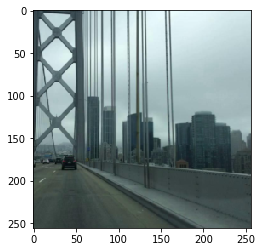

In [26]:
sample = dataset.__getitem__(13)
im = np.array(transforms.ToPILImage()(sample))
plt.imshow(im);

In [3]:
mask = sign_mask.clone()
# mask[mask>0]=1

NameError: name 'sign_mask' is not defined

In [34]:
sign_mask, x, y = mask_gen.generate_mask()

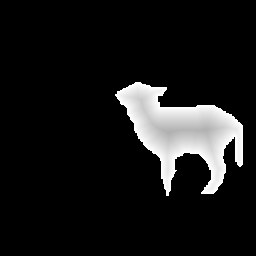

In [35]:
transforms.ToPILImage()(sign_mask)

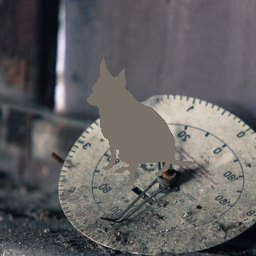

In [19]:
im = sample * (1-mask) + dataset.background * mask
transforms.ToPILImage()(im)

In [6]:
from scipy import ndimage

In [71]:
maskdir = '../data/masks'
canvas = np.zeros((130, 130))
for f in os.listdir(maskdir):
    filename = os.path.join(maskdir, f)
    mask = Image.open(filename)
    canvas[1:-1, 1:-1] = np.array(mask)
    d = ndimage.distance_transform_edt(canvas)
    d[d>0] = 0.985**d[d>0]
    skimage.io.imsave(filename, d[1:-1, 1:-1])

/home/dmitrii/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [145]:
maskdir = '../data/masks'
for f in os.listdir(maskdir):
    filename = os.path.join(maskdir, f)
    mask = skimage.io.imread(filename)
    mask = np.all(mask==np.array([128,0,0]), axis=2).astype(np.uint8)
    ind = np.nonzero(mask)
    w_min, w_max = min(ind[1]), max(ind[1])
    h_min, h_max = min(ind[0]), max(ind[0])
    mask = mask[h_min:h_max,w_min:w_max]
    mask = skimage.transform.rescale(mask, 128 / max(mask.shape[0], mask.shape[1]), preserve_range=True)  
    skimage.io.imsave(filename, np.round(mask))

/home/dmitrii/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dmitrii/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/dmitrii/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/masks/2007_006704.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [162]:
for f in os.listdir(maskdir):
    filename = os.path.join(maskdir, f)
    mask = skimage.io.imread(filename)
    w_to_pad = 128 - mask.shape[1]
    h_to_pad = 128 - mask.shape[0]
    mask = np.pad(mask, ((h_to_pad//2, h_to_pad-h_to_pad//2), (w_to_pad//2, w_to_pad-w_to_pad//2)), mode='constant')
    skimage.io.imsave(filename, np.round(mask))

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

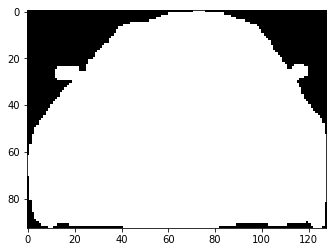

In [147]:
from IPython import display
for f in os.listdir(maskdir):
    filename = os.path.join(maskdir, f)
    img = Image.open(filename)
    plt.imshow(img)
    display.display(plt.gcf())
    r = input("Y or N: ")
    if r == "n":
        os.remove(filename)
    display.clear_output(wait=True)

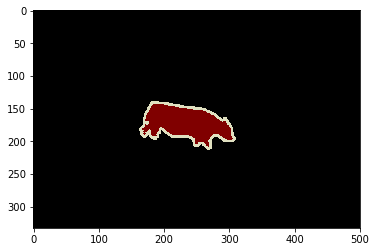

KeyboardInterrupt: 

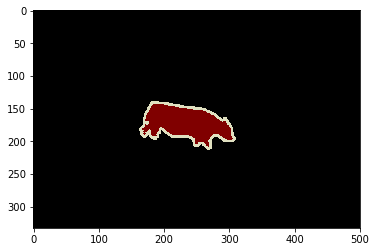

In [2]:
rootdir = "../data/VOCdevkit/VOC2012/SegmentationObject/"

from IPython import display
for f in os.listdir(rootdir):
    filename = os.path.join(rootdir, f)
    img = Image.open(filename)
    plt.imshow(img)
    display.display(plt.gcf())
    r = input("Y or N: ")
    if r == "n":
        os.remove(filename)
    elif r == "y":
        os.rename(filename, os.path.join("../data/masks", f))
    display.clear_output(wait=True)